In [1]:
import numpy as np
import panel as pn
import matplotlib.pyplot as plt

Column
    [0] FloatSlider(end=10.0, name='Puissance', start=0.1, value=1.0)
    [1] ParamFunction(function, _pane=Matplotlib)
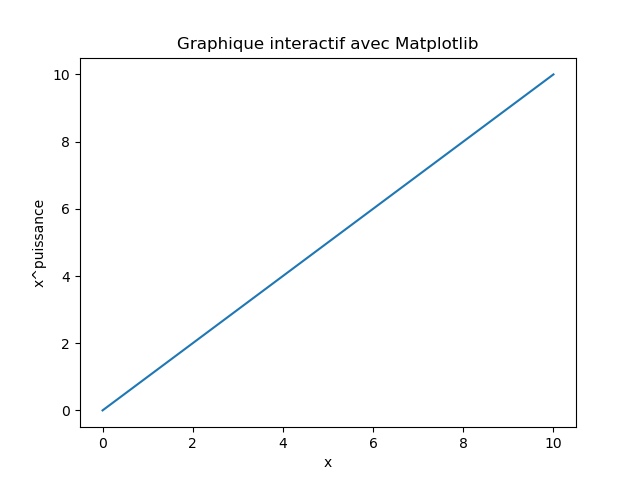

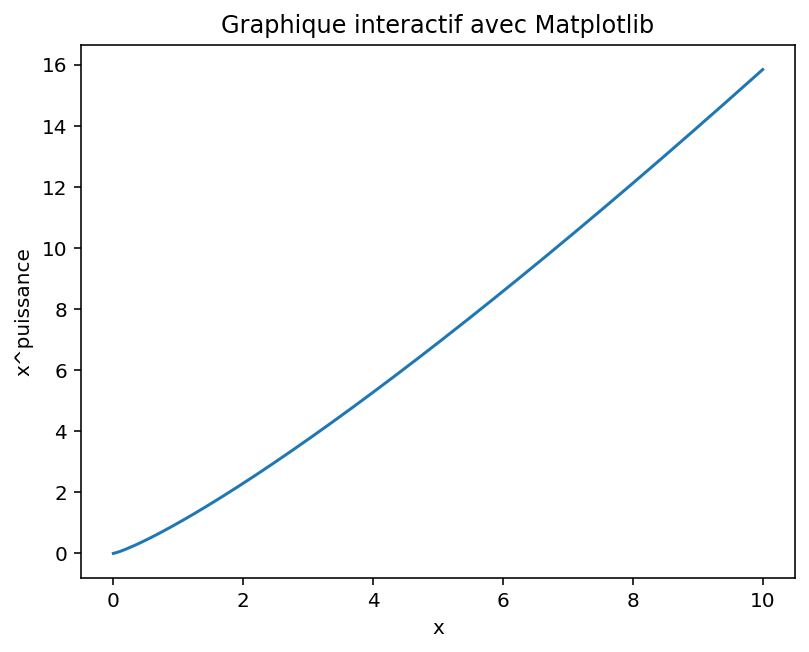

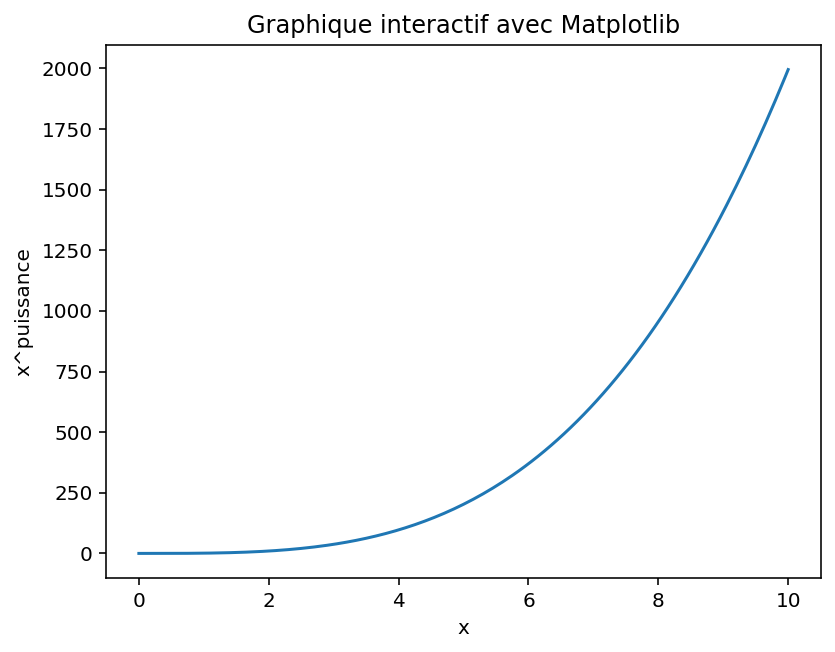

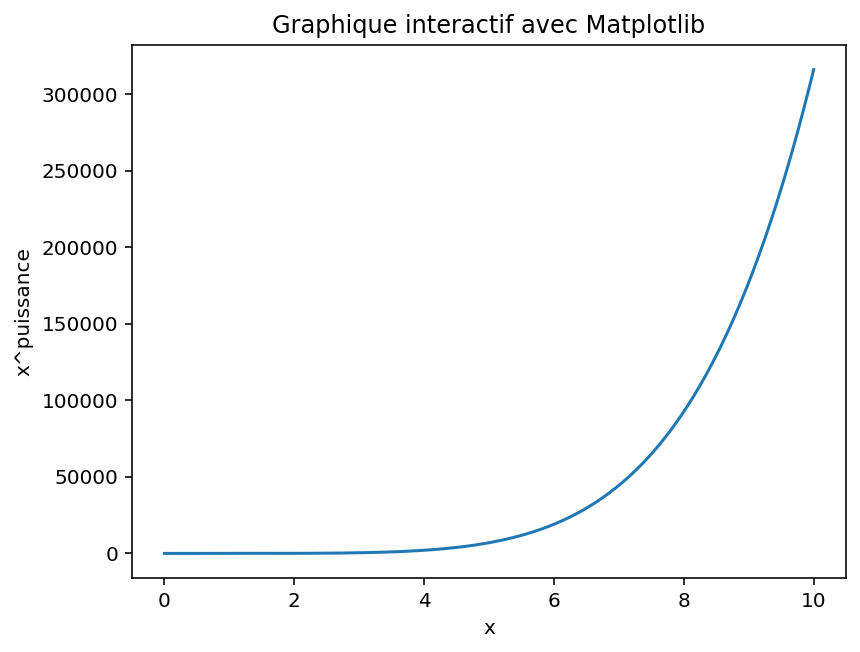

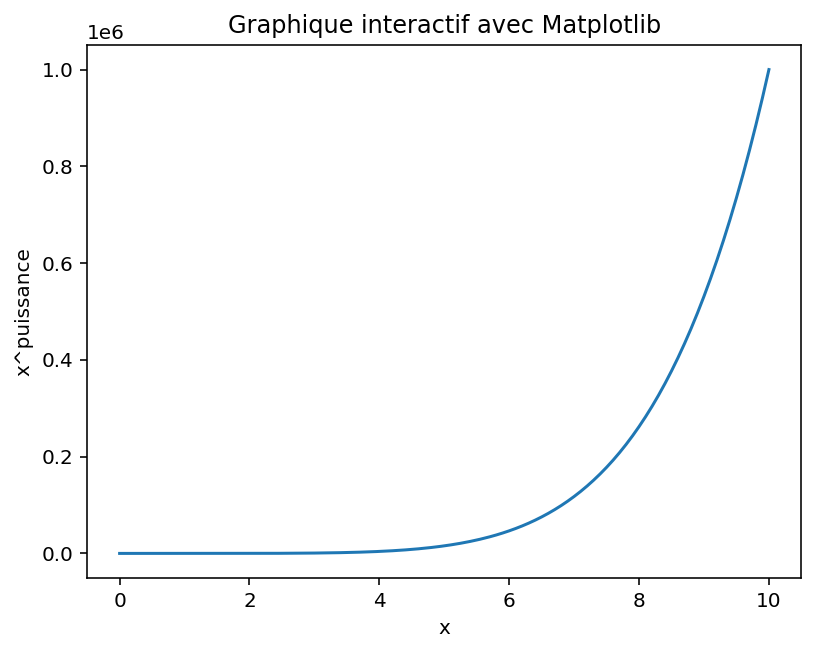

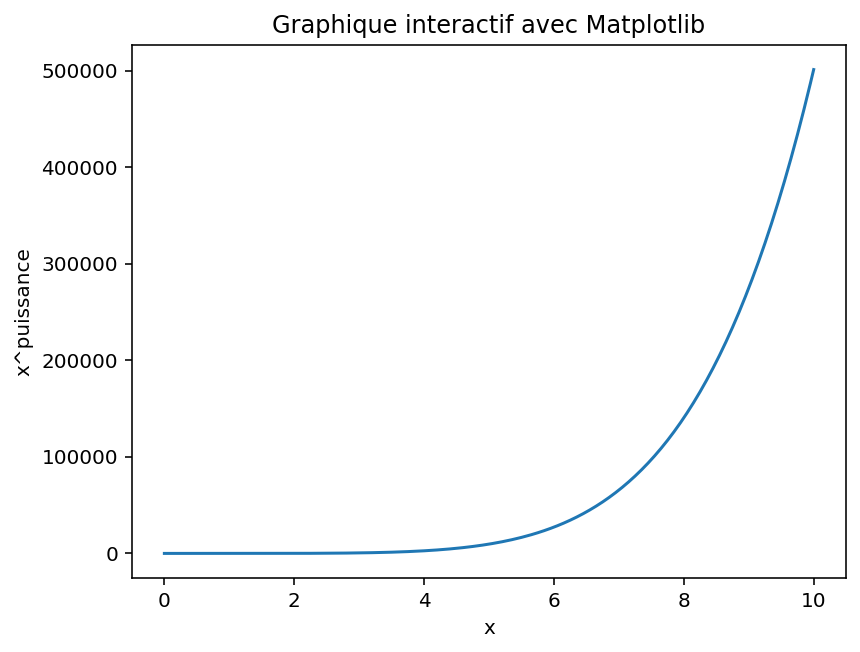

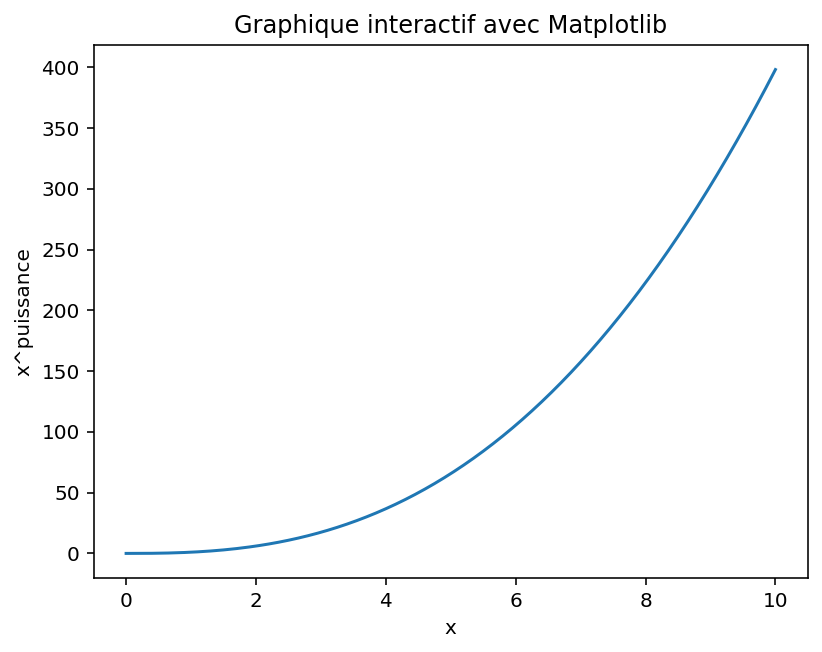

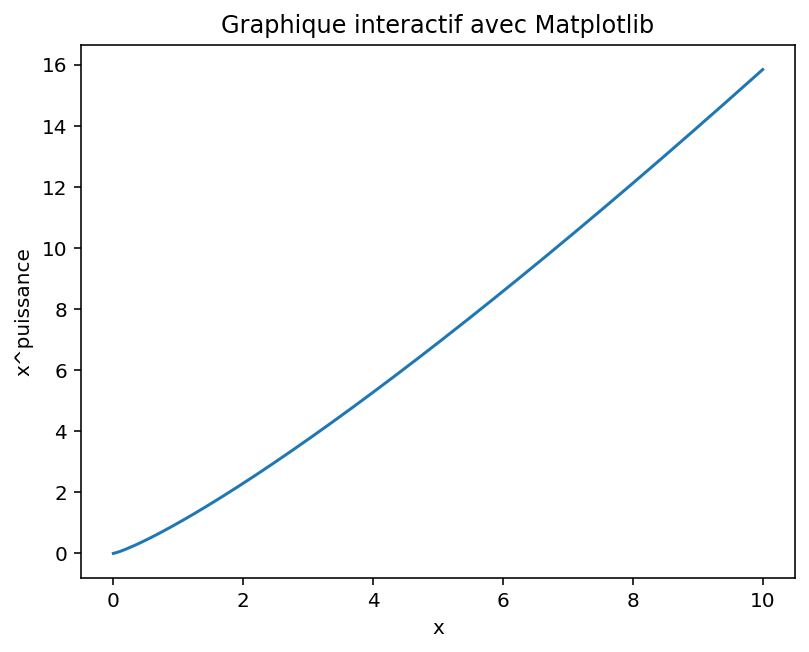

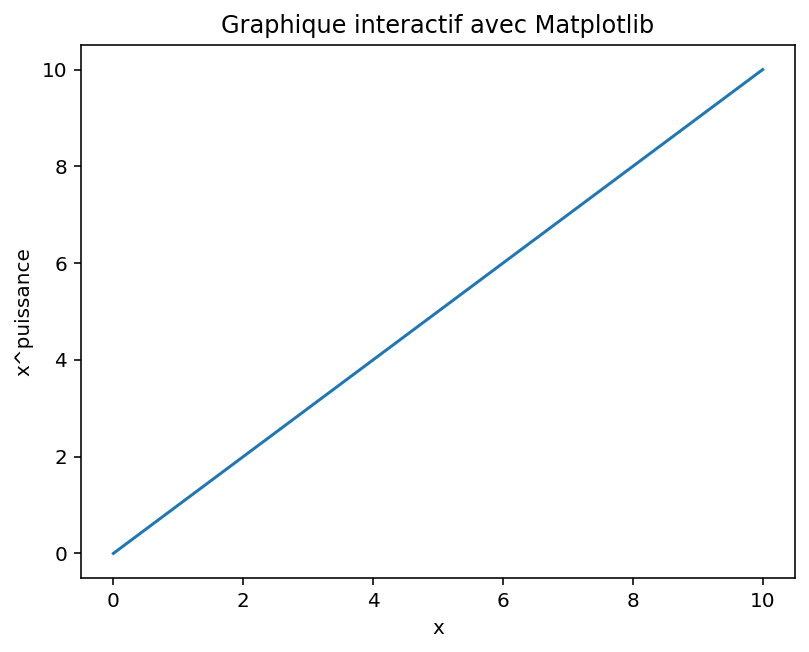

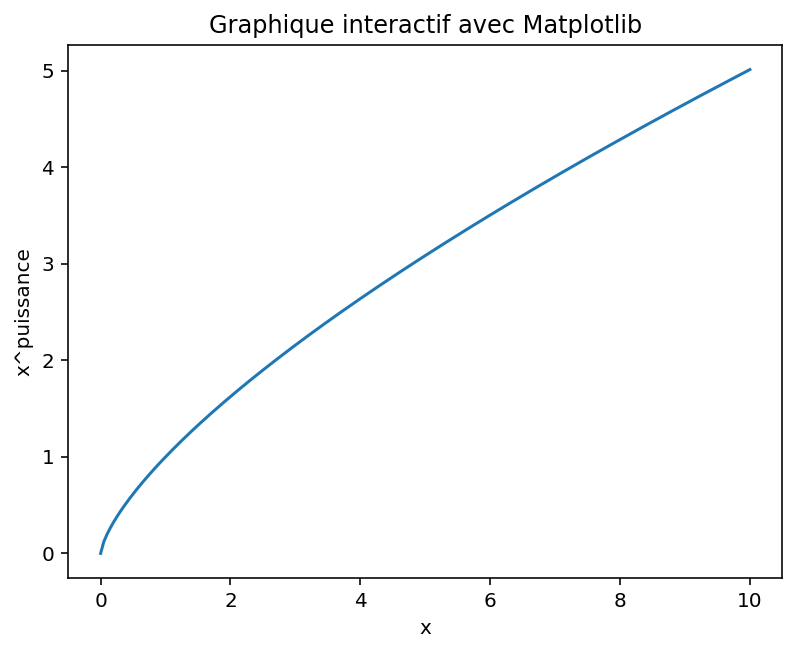

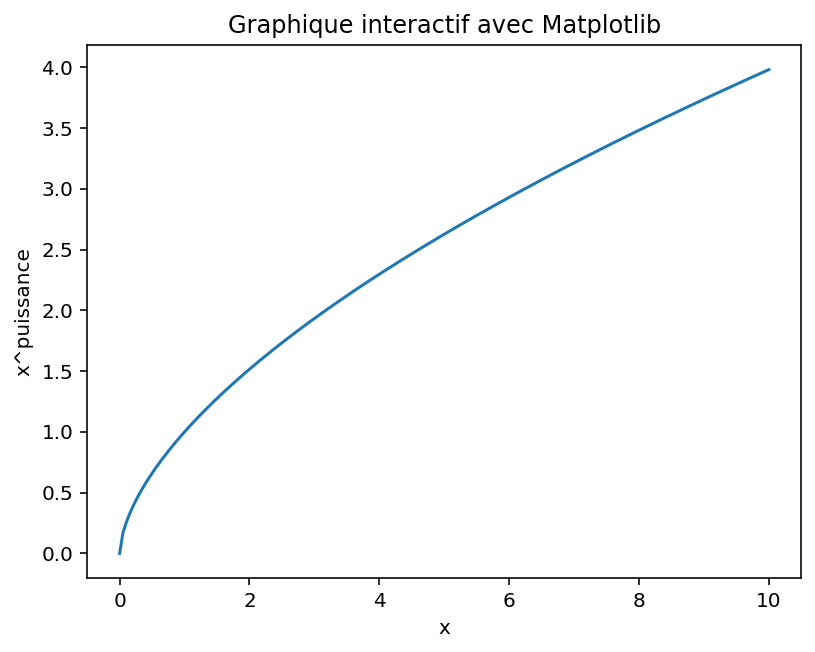

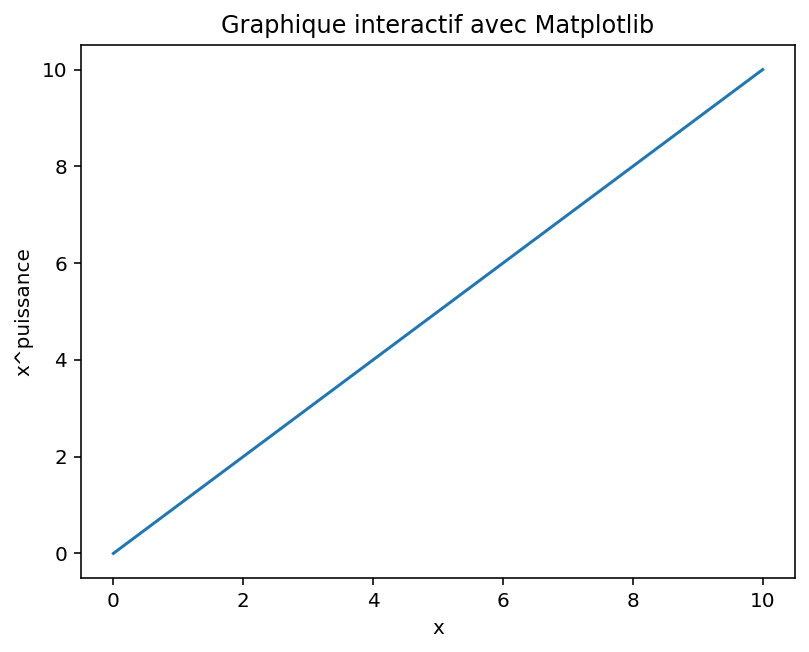

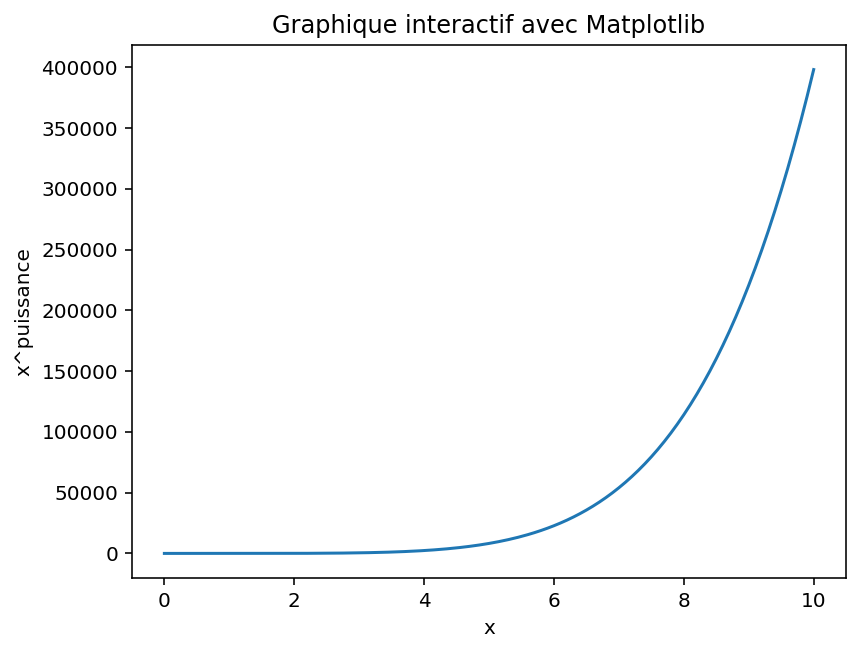

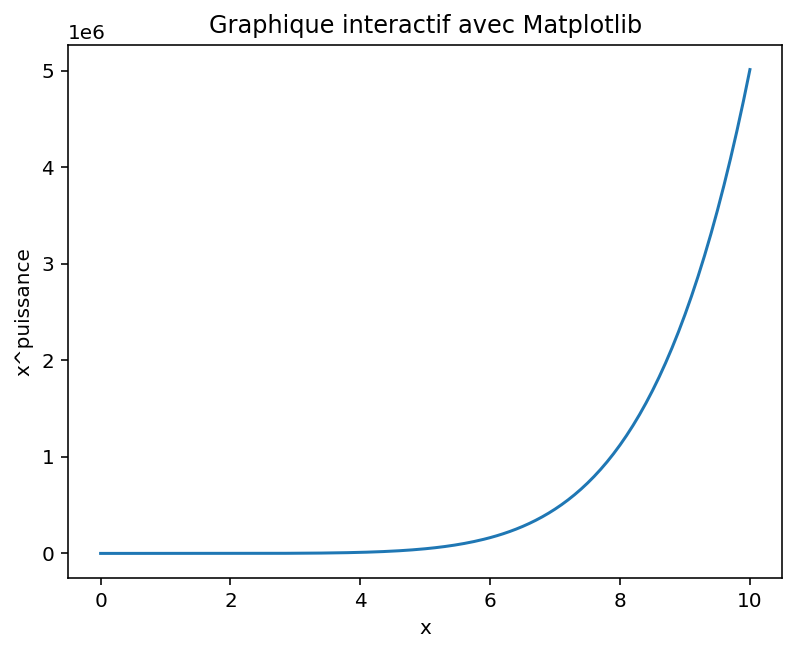

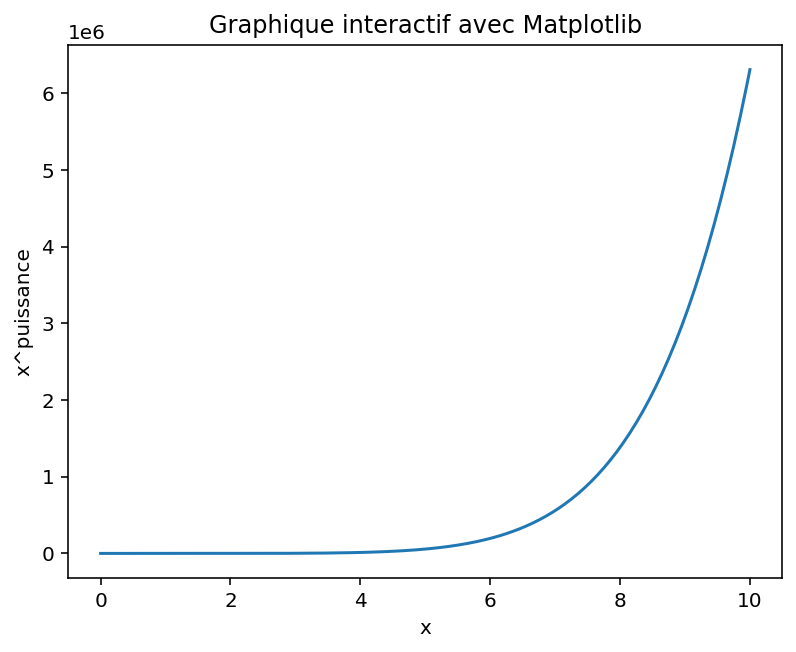

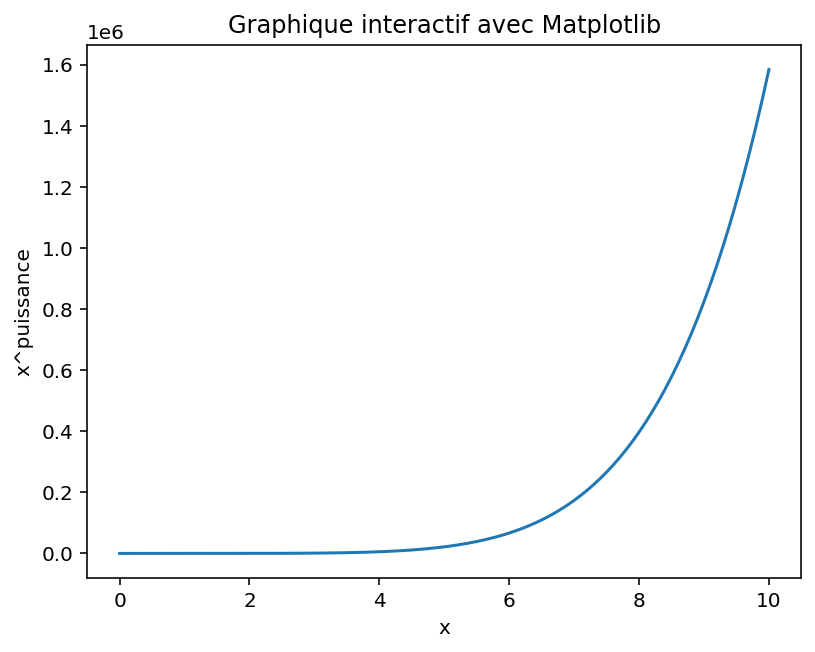

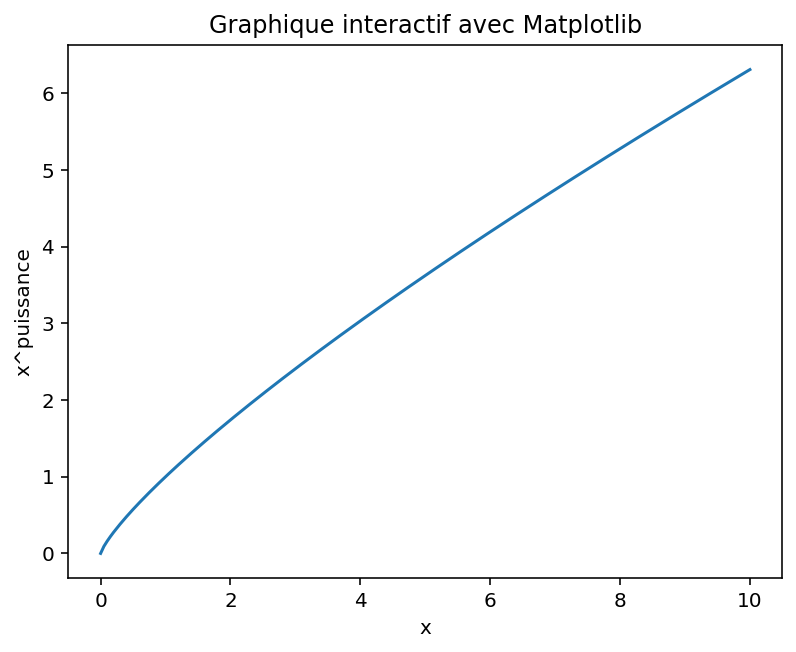

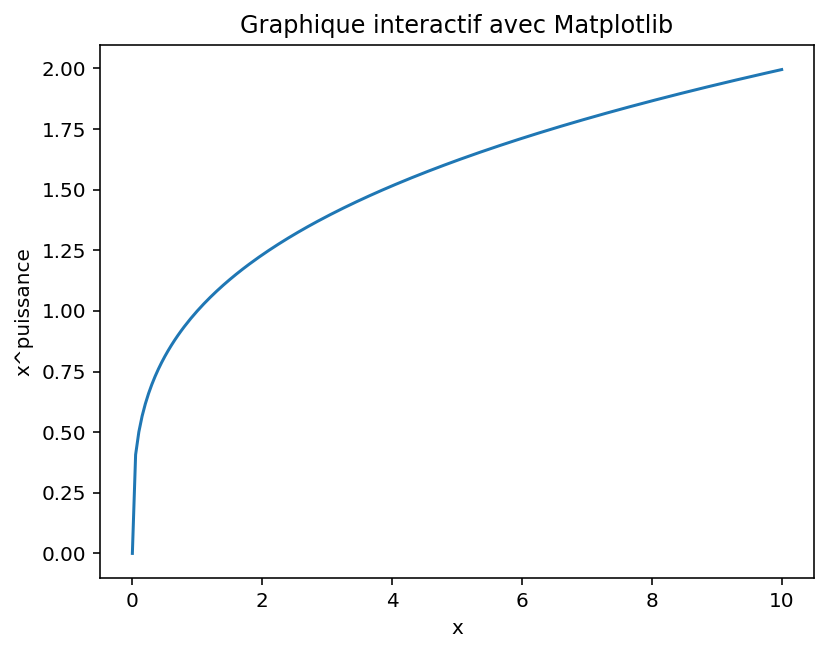

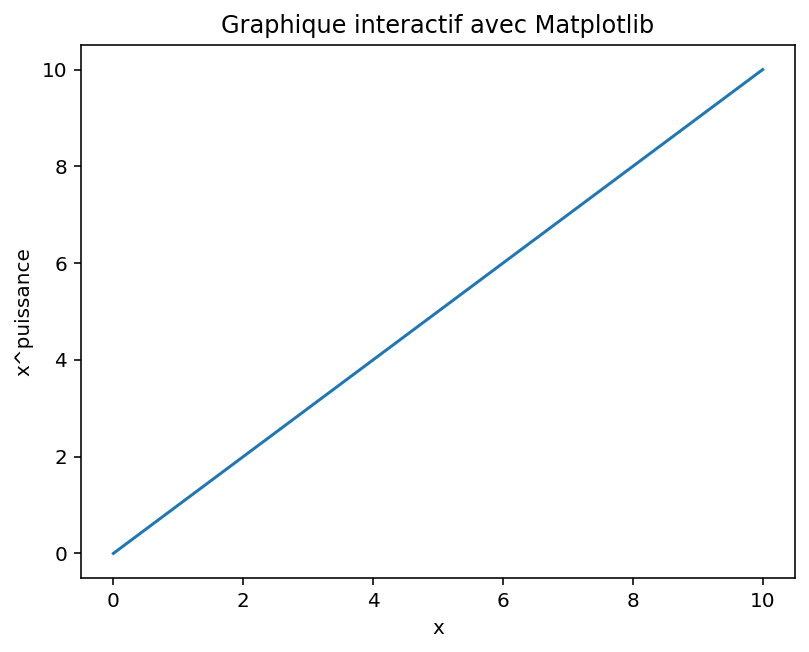

In [10]:
#chargement de l'extension Panel
pn.extension()

# Données pour le graphique
x = np.linspace(0, 10, 201)

# Fonction pour créer un graphique Matplotlib interactif
def plot_matplotlib(puissance):
    fig, ax = plt.subplots()
    ax.plot(x, x**puissance)
    ax.set_title('Graphique interactif avec Matplotlib')
    ax.set_xlabel('x')
    ax.set_ylabel('x^puissance')
    return fig

# Création du panneau interactif avec un widget pour la puissance
puissance_widget = pn.widgets.FloatSlider(name='Puissance', start=0.1, end=10.0, step=0.1, value=1.0)

@pn.depends(puissance_widget.param.value)
def update_plot(puissance):
    return plot_matplotlib(puissance)

# Création du panneau interactif
panel_matplotlib = pn.Column(puissance_widget, update_plot)

# Affichage du panneau interactif
panel_matplotlib